In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target

In [3]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [4]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [5]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1])

In [7]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [28]:
# расчет точности 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7368421052631579

In [47]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

Text(0, 0.5, 'sepal width (cm)')

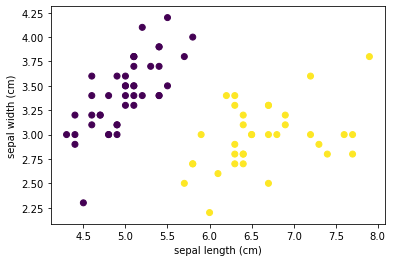

In [84]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


In [49]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [50]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.99534884, 3.42790698],
       [6.62941176, 2.97352941]])

Text(0, 0.5, 'sepal width (cm)')

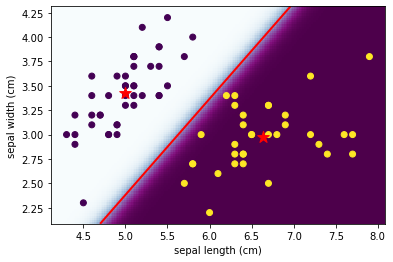

In [85]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='BuPu',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [52]:
# оба признака практически одинаково важны для кластеризации (это видно по визуализации)
lda_small.coef_

array([[ 12.35567538, -12.53846299]])

In [29]:
# Точность будет
accuracy_score(sy_test, lda_small.predict(small_test))

0.9565217391304348

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [56]:
lr.predict(small_test)

array([2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2])

In [57]:
accuracy_score(sy_test, lr.predict(small_test))

0.9565217391304348

In [58]:
lr.coef_

array([[ 3.0820996 , -1.71719454]])

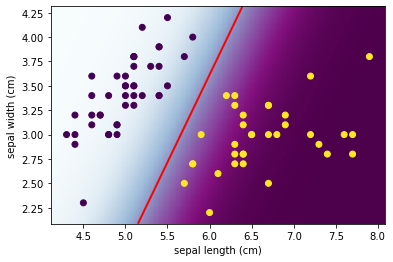

In [86]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='BuPu',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

Text(0, 0.5, 'sepal width (cm)')

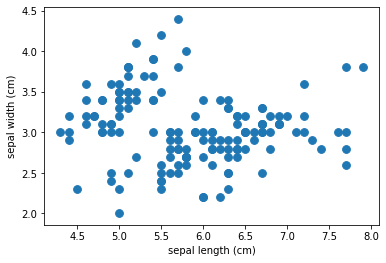

In [94]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', s=60)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [95]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data)

Text(0, 0.5, 'sepal width (cm)')

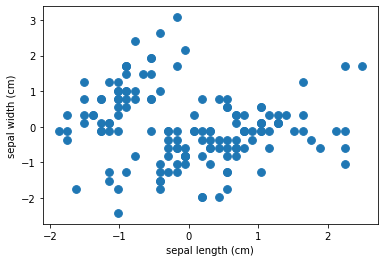

In [98]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [99]:
from sklearn.cluster import KMeans

In [100]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)


Text(0.5, 1.0, 'график локтя')

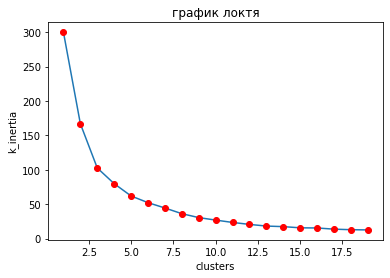

In [101]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('clusters')
plt.ylabel('k_inertia')
plt.title('график локтя')

In [102]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

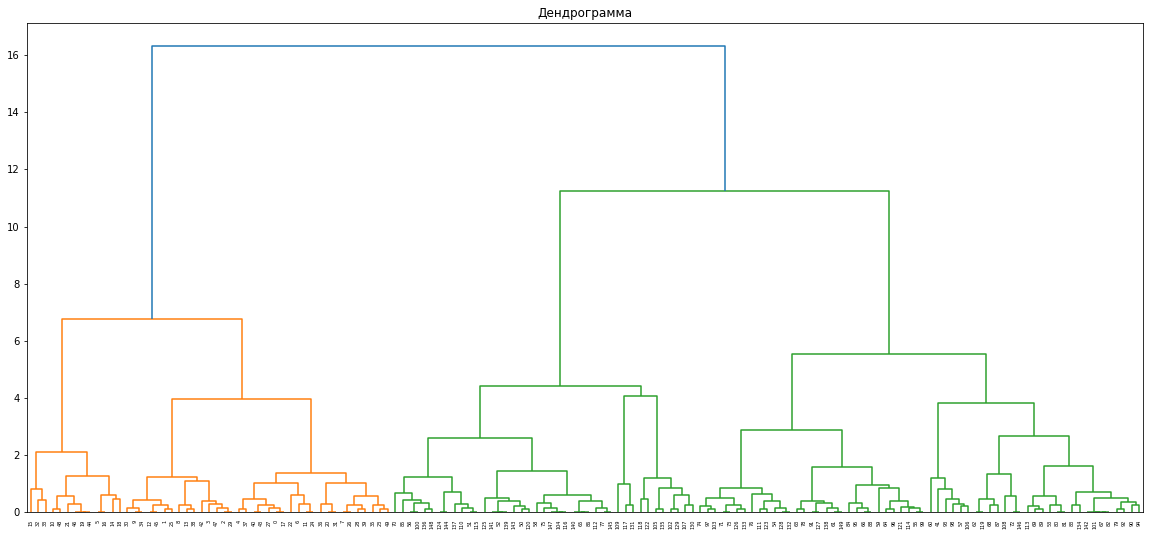

In [103]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
plt.title('Дендрограмма')
dn = hierarchy.dendrogram(Z)

In [104]:
# По графику локтя и дендрограмме делаем  кластеризацию уже по факту
from sklearn.cluster import AgglomerativeClustering

In [105]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

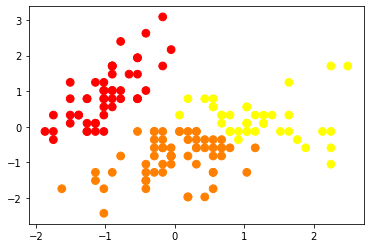

In [106]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)